In [1]:
from Library import *
from datetime import datetime
import seaborn as sns

In [2]:
def ConvertMonth(lst):
    for i in range(len(lst)):
        if lst[i] == 1: 
            lst[i] = 'Jan'
        elif lst[i] == 2:
            lst[i] = 'Feb'
        elif lst[i] == 3:
            lst[i] = 'Mar'
        elif lst[i] == 4:
            lst[i] = 'Apr'
        elif lst[i] == 5:
            lst[i] = 'May'
        elif lst[i] == 6:
            lst[i] = 'Jun'
        elif lst[i] == 7:
            lst[i] = 'Jul'
        elif lst[i] == 8:
            lst[i] = 'Aug'
        elif lst[i] == 9:
            lst[i] = 'Sep'
        elif lst[i] == 10:
            lst[i] = 'Oct'
        elif lst[i] == 11:
            lst[i] = 'Nov'
        elif lst[i] == 12:
            lst[i] = 'Dec'
    


In [3]:
data = pd.read_csv('fcc.csv')
data

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [4]:
data = data[
    (data['value'] >= data['value'].quantile(2.5/100))
    & (data['value'] <= data['value'].quantile(97.5/100))
]
data

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


draw line plot

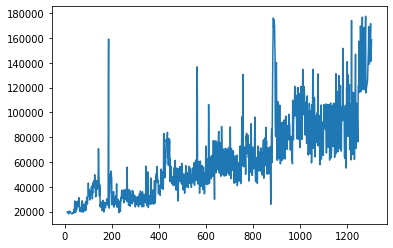

In [5]:
plt.subplots()
plt.plot(
    data.index,data['value'],
)

draw bar plot

In [6]:
data.index = data['date']
data = data.drop(columns= 'date')

In [7]:
data.index = pd.to_datetime(data.index)
data['month'] = data.index.month
data['year'] = data.index.year
data

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


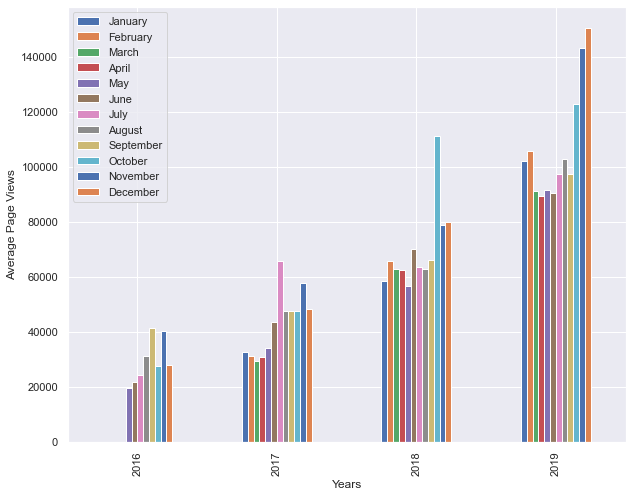

In [30]:
grp = data.pivot_table(columns = 'month',index = 'year',values = 'value')
grp.plot(kind = 'bar',xlabel = 'Years',ylabel = 'Average Page Views')
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])

draw box plot 

,date,value,month,year
0,2016-05-19,19736,5,2016
1,2016-05-26,18060,5,2016
2,2016-05-27,19997,5,2016
3,2016-05-28,19044,5,2016
4,2016-05-29,20325,5,2016
...,...,...,...,...
1233,2019-11-24,138875,11,2019
1234,2019-11-29,171584,11,2019
1235,2019-11-30,141161,11,2019
1236,2019-12-01,142918,12,2019


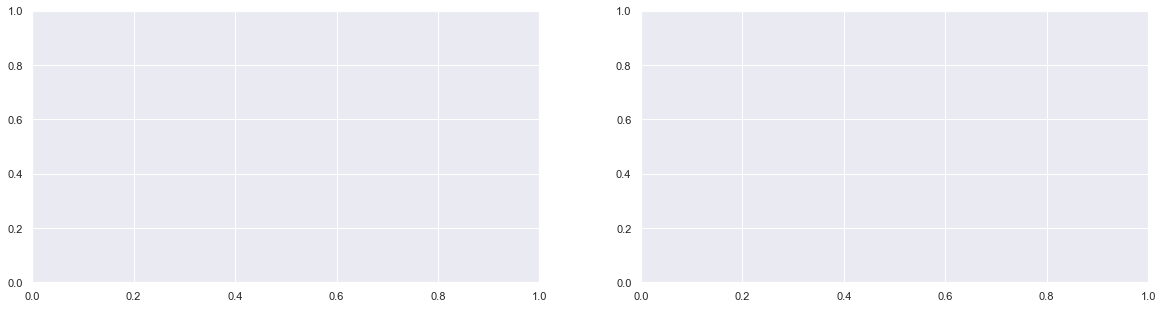

In [45]:
sns.set(rc={'figure.figsize':(10,8)})
data_box = data.copy()
data_box.reset_index(inplace = True)
fig, axis = plt.subplots(nrows = 1,ncols= 2 ,figsize = (20,5))#2 cột

lst = data_box['month']
ConvertMonth(lst)
data_box['month'] = lst

axis[0] = sns.boxplot(
    x = data_box['year'],
    y= data_box['value'],
    ax = axis[0]
)
axis[0].set_title('Year-wise Box Plot (Trend)')
axis[0].set_xlabel('Year')
axis[0].set_ylabel('Page Views')

axis[1] = sns.boxplot(
    x = data_box['month'],
    y= data_box['value'],
    ax = axis[1]
)
axis[1].set_title('Month-wise Box Plot (Seasonality)')
axis[1].set_xlabel('Month')
axis[1].set_ylabel('Page Views')
